# ADA AND BTC ANALYSIS AND TIMESERIES PREDICTION

# Introduction

Cardano is a cryptocurrency network and open source project that aims to run a public blockchain platform for smart contracts. Cardano's internal cryptocurrency is called Ada. The development of the project is overseen and supervised by the Cardano Foundation based in Zug, Switzerland.

The platform began development in 2015 and was launched in 2017 by Charles Hoskinson, a co-founder of Ethereum and BitShares. According to Hoskinson, he had left Ethereum after a dispute over keeping Ethereum nonprofit. After leaving he co-founded IOHK, a blockchain engineering company, whose primary business is the development of Cardano, alongside the Cardano Foundation and Emurgo.The platform is named after Gerolamo Cardano and the cryptocurrency after Ada Lovelace.

The currency debuted with a market cap of 600 million dollars. By the end of 2017, it had a market cap of 10 billion dollars, and reached a value of 33 billion dollars briefly in 2018 before a general tightening of the crypto market dropped its value back to 10 billion dollars. According to Mashable, Cardano claims that it overcomes existing problems in the crypto market: mainly that Bitcoin is too slow and inflexible, and that Ethereum is not safe or scalable. Cardano is considered a third-generation cryptocurrency by its creators.

# 1 Understand the problem and import the more important libraries

I want to compare ADA with BTC (Bitcoin) which all of you should know. If not: https://en.wikipedia.org/wiki/Bitcoin

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

First of all I downloaded both datasets and import them to the project. I took data from Jan 2018 ultil Feb 2021.

In [211]:
#Load de data
cardano_hst = pd.read_csv('C:/Users/torre/OneDrive/Escritorio/PERSONAL/DATA SCIENCE/Cardano/Cardano Historical Data - Investing - 2016.csv')
cardano_hst.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Feb 20, 2021",1.149122,0.925955,1.176955,0.914190,1.80B,24.11%
1,"Feb 19, 2021",0.925894,0.913695,0.945353,0.880769,839.10M,1.33%
2,"Feb 18, 2021",0.913752,0.891719,0.956599,0.891719,904.68M,2.47%
3,"Feb 17, 2021",0.891702,0.870390,0.897079,0.823855,750.02M,2.45%
4,"Feb 16, 2021",0.870393,0.859853,0.905065,0.834791,929.87M,1.19%


We got the Closed attribute ase Price

In [212]:
bitcoin_hst = pd.read_csv('C:/Users/torre/OneDrive/Escritorio/PERSONAL/DATA SCIENCE/Cardano/Bitcoin Historical Data - Investing.com.csv', thousands=",")
bitcoin_hst.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Feb 20, 2021",55923.7,55922.0,57523.8,54124.1,127.85K,0.03%
1,"Feb 19, 2021",55906.6,51590.1,56238.5,50816.8,139.43K,8.38%
2,"Feb 18, 2021",51582.2,52094.5,52524.0,50941.6,94.35K,-0.95%
3,"Feb 17, 2021",52079.2,49161.3,52577.7,49018.1,140.03K,5.92%
4,"Feb 16, 2021",49169.7,47934.2,50515.8,47044.4,141.37K,2.57%


In [213]:
cardano_hst.shape

(1148, 7)

In [214]:
bitcoin_hst.shape

(1148, 7)

In [215]:
cardano_hst.describe()

,Price,Open,High,Low
count,1148.000000,1148.000000,1148.000000,1148.000000
mean,0.133454,0.133274,0.140585,0.124751
std,0.160964,0.160209,0.173440,0.144590
min,0.023222,0.023225,0.026454,0.017774
25%,0.045895,0.045884,0.047424,0.044232
50%,0.081616,0.081616,0.084058,0.078212
75%,0.143326,0.143324,0.148790,0.137339
max,1.149122,1.180000,1.350000,1.050000


We can get from this data indicators that the historical maximum is 1.35 but never closed like that or even higher that 1.149122. Also we can see that the std (standard deviation) is higher on 'High' than in the other ones so that mean the cryptocurrency market fluctuate more on higher values.

In [216]:
bitcoin_hst.describe()

,Price,Open,High,Low
count,1148.000000,1148.000000,1148.000000,1148.000000
mean,10023.177003,9985.070035,10278.126394,9684.443118
std,7313.543011,7186.251726,7540.971388,6895.392082
min,3228.700000,3228.600000,3282.300000,3177.000000
25%,6597.875000,6597.575000,6708.500000,6472.175000
50%,8544.700000,8544.800000,8743.650000,8243.850000
75%,10405.225000,10404.775000,10736.575000,10130.675000
max,55923.700000,55922.000000,57523.800000,54124.100000


# 2 Data Preparation

In [217]:
cardano_hst = cardano_hst.rename(columns={"Vol.": "Vol","Change %": "Change"})
bitcoin_hst = bitcoin_hst.rename(columns={"Vol.": "Vol","Change %": "Change"})

In [218]:
cardano_hst.head()

,Date,Price,Open,High,Low,Vol,Change
0,"Feb 20, 2021",1.149122,0.925955,1.176955,0.914190,1.80B,24.11%
1,"Feb 19, 2021",0.925894,0.913695,0.945353,0.880769,839.10M,1.33%
2,"Feb 18, 2021",0.913752,0.891719,0.956599,0.891719,904.68M,2.47%
3,"Feb 17, 2021",0.891702,0.870390,0.897079,0.823855,750.02M,2.45%
4,"Feb 16, 2021",0.870393,0.859853,0.905065,0.834791,929.87M,1.19%


In [219]:
import datetime

# Convert Date to datetime
cardano_hst['Date'] = pd.to_datetime(cardano_hst['Date'])
cardano_hst['Crypto'] = 'ADA'
bitcoin_hst['Date'] = pd.to_datetime(bitcoin_hst['Date'])
bitcoin_hst['Crypto'] = 'BTC'

I'll probably want to concatenate both datasets so thats why I created the Crypto attribute to differentiate rows.

In [220]:
cardano_hst.head()

,Date,Price,Open,High,Low,Vol,Change,Crypto
0,2021-02-20,1.149122,0.925955,1.176955,0.914190,1.80B,24.11%,ADA
1,2021-02-19,0.925894,0.913695,0.945353,0.880769,839.10M,1.33%,ADA
2,2021-02-18,0.913752,0.891719,0.956599,0.891719,904.68M,2.47%,ADA
3,2021-02-17,0.891702,0.870390,0.897079,0.823855,750.02M,2.45%,ADA
4,2021-02-16,0.870393,0.859853,0.905065,0.834791,929.87M,1.19%,ADA


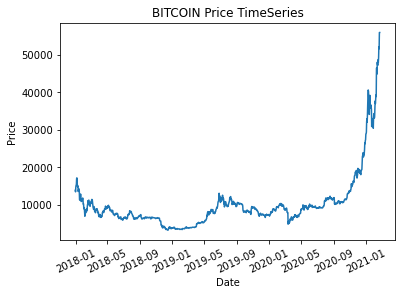

In [224]:
import seaborn as sns

sns.lineplot(x='Date', y='Price', data=bitcoin_hst)
plt.xticks(rotation=25)
plt.title('BITCOIN Price TimeSeries')
plt.show()

Probably we should plot some information grouped by the date sub-attributes so that's why the next code.

In [225]:
cardano_hst = cardano_hst.set_index('Date')

cardano_hst['Year'] = cardano_hst.index.year
cardano_hst['Month'] = cardano_hst.index.month
cardano_hst['Day'] = cardano_hst.index.day

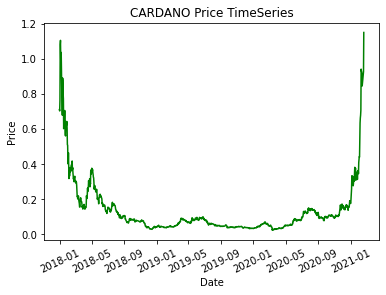

In [226]:
sns.lineplot(x="Date", y="Price", data=cardano_hst, color='green')
plt.xticks(rotation=25)
plt.title('CARDANO Price TimeSeries')
plt.show()

In [227]:
bitcoin_hst['Change'] = bitcoin_hst['Change'].str.replace('%', '')
bitcoin_hst['Vol'] = bitcoin_hst['Vol'].str.replace('B', '000000000')
bitcoin_hst['Vol'] = bitcoin_hst['Vol'].str.replace('M', '000000')
bitcoin_hst['Vol'] = bitcoin_hst['Vol'].str.replace('K', '000')
bitcoin_hst['Vol'] = bitcoin_hst['Vol'].str.replace('.', '')
#bitcoin_hst = bitcoin_hst.drop(columns=['Date'])

<ipython-input-227-afd584413ff3>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  bitcoin_hst['Vol'] = bitcoin_hst['Vol'].str.replace('.', '')


In [228]:
bitcoin_hst.head()

,Date,Price,Open,High,Low,Vol,Change,Crypto
0,2021-02-20,55923.7,55922.0,57523.8,54124.1,12785000,0.03,BTC
1,2021-02-19,55906.6,51590.1,56238.5,50816.8,13943000,8.38,BTC
2,2021-02-18,51582.2,52094.5,52524.0,50941.6,9435000,-0.95,BTC
3,2021-02-17,52079.2,49161.3,52577.7,49018.1,14003000,5.92,BTC
4,2021-02-16,49169.7,47934.2,50515.8,47044.4,14137000,2.57,BTC


In [229]:
cardano_hst['Change'] = cardano_hst['Change'].str.replace('%', '')
cardano_hst['Vol'] = cardano_hst['Vol'].str.replace('B', '000000000')
cardano_hst['Vol'] = cardano_hst['Vol'].str.replace('M', '000000')
cardano_hst['Vol'] = cardano_hst['Vol'].str.replace('.', '')
#cardano_hst = cardano_hst.drop(columns=['Date'])

<ipython-input-229-9f8d90b4cd53>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  cardano_hst['Vol'] = cardano_hst['Vol'].str.replace('.', '')


In [230]:
cardano_hst.head()

,Price,Open,High,Low,Vol,Change,Crypto,Year,Month,Day
Date,,,,,,,,,,
2021-02-20,1.149122,0.925955,1.176955,0.914190,180000000000,24.11,ADA,2021,2,20
2021-02-19,0.925894,0.913695,0.945353,0.880769,83910000000,1.33,ADA,2021,2,19
2021-02-18,0.913752,0.891719,0.956599,0.891719,90468000000,2.47,ADA,2021,2,18
2021-02-17,0.891702,0.870390,0.897079,0.823855,75002000000,2.45,ADA,2021,2,17
2021-02-16,0.870393,0.859853,0.905065,0.834791,92987000000,1.19,ADA,2021,2,16


In [231]:
cardano_hst.isnull().any()

Price     False
Open      False
High      False
Low       False
Vol       False
Change    False
Crypto    False
Year      False
Month     False
Day       False
dtype: bool

# 4 Data Analysis for ADA

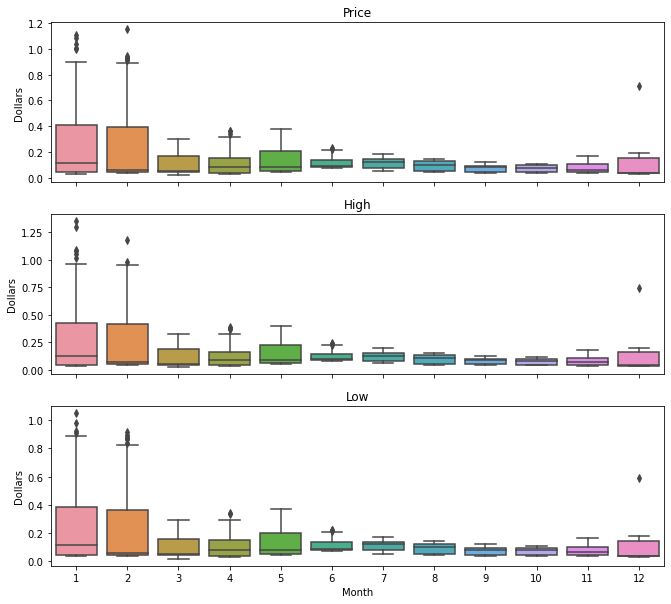

In [236]:
cardano_hst['Month'] = cardano_hst.index.month

ig, axes = pt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Price', 'High', 'Low'], axes):
    sns.boxplot(data=cardano_hst, x='Month', y=name, ax=ax)
    ax.set_ylabel('Dollars')
    ax.set_title(name)
    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

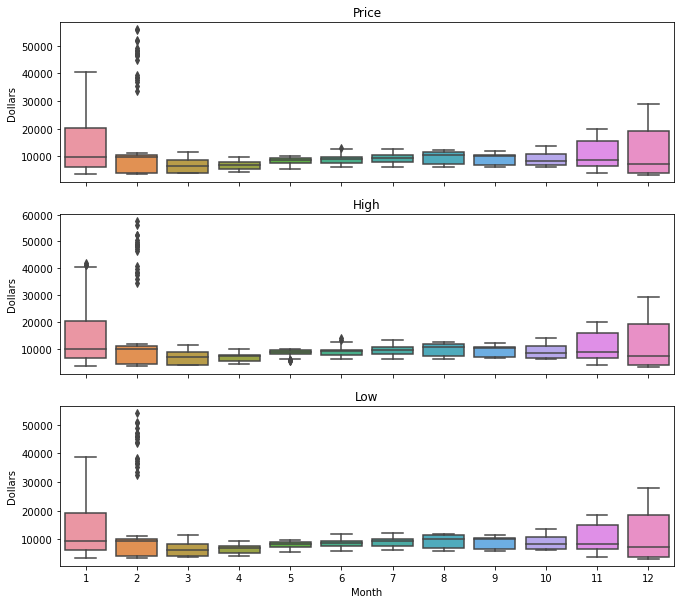

In [238]:
bitcoin_hst = bitcoin_hst.set_index('Date')
bitcoin_hst['Month'] = bitcoin_hst.index.month

ig, axes = pt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Price', 'High', 'Low'], axes):
    sns.boxplot(data=bitcoin_hst, x='Month', y=name, ax=ax)
    ax.set_ylabel('Dollars')
    ax.set_title(name)
    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

I am definitely not a trader or a broker but if I wanted to play some money on this I would probably earn more money on January, February, May and December for ADA and the same for BTC but November instead of May.

# 4 Time Series Forecasting using RandomForestRegressor

In [154]:
from sklearn.ensemble import RandomForestRegressor

In [155]:
# Read the data
train = cardano_hst

In [ ]:
# pull data into target (y) and predictors (X)
train_y = train.Price
predictor_cols = ['Open', 'High', 'Low', 'Vol']

# Create training predictors data
train_X = train[predictor_cols]

my_model = RandomForestRegressor()
my_model.fit(train_X, train_y)